In [1]:
import matplotlib.pyplot as plt
from utils import *

Отсортируем датафрейм по query_id

In [2]:
df = pd.read_csv('intern_task.csv')
df = sort_df(df)
df

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.0,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,2,10,3.0,3.0,3.0,1.0,3.0,1.000000,1.0,1.000000,...,0.0,0.0,0.142857,0.998020,22.936731,0.333333,0.022648,0.000009,31.0,10.333333
2,0,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,2,10,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.997559,0.000000,0.000000,0.010774,0.000001,16.0,5.333333
4,1,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,1,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
235254,1,29995,1.0,1.0,1.0,1.0,1.0,0.500000,0.5,0.500000,...,0.0,0.0,0.111111,0.471409,13.302685,0.500000,0.019608,0.000037,1.0,0.500000
235255,2,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.0,0.000000,0.471409,0.000000,0.000000,0.003916,0.000017,3.0,1.500000
235256,1,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.0,0.000000,0.471409,0.000000,0.000000,0.003077,0.000010,4.0,2.000000


В датасете есть фичи, которые принимают только одно значение:

In [3]:
df = drop_features(df)

name: feature_64 | item: 0 | dtype: int64
name: feature_65 | item: 0 | dtype: int64
name: feature_72 | item: 1 | dtype: int64
name: feature_100 | item: 0 | dtype: int64


Посмотрим на распределение рангов

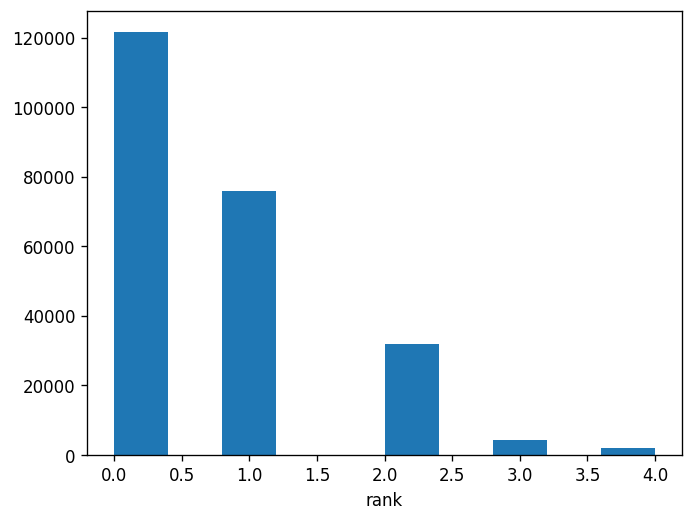

In [4]:
plt.figure(dpi=120)
plt.hist(df['rank'])
plt.xlabel('rank')
None

Виден явный дисбаланс. Проверим, что происходит в отдельных query_id

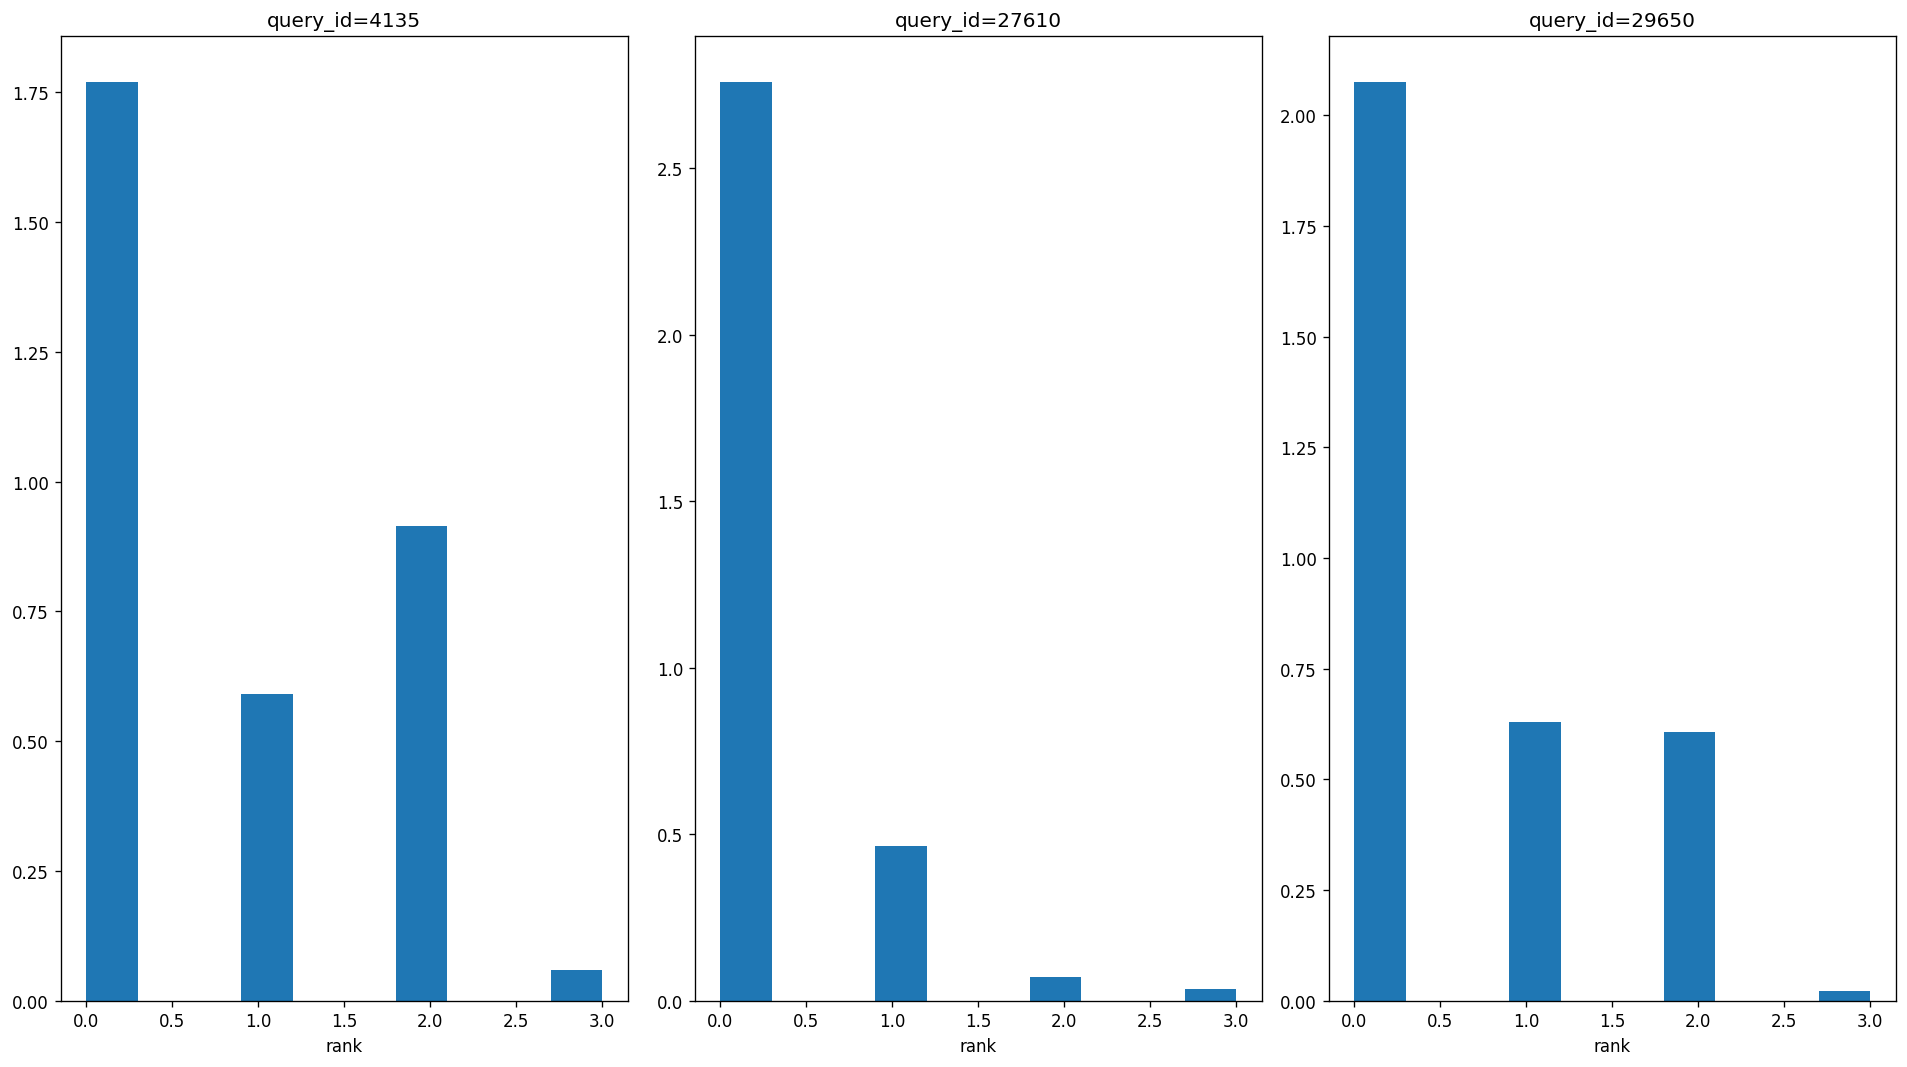

In [5]:
queries = df['query_id'].sample(n=3).values
fig, axs = plt.subplots(1, queries.shape[0], tight_layout=True, dpi=120, figsize=(16, 9))
for ax, q in zip(axs, queries):
    ax.hist(df[df['query_id'] == q]['rank'], density=True)
    ax.set_title(f"query_id={q}")
    ax.set_xlabel("rank")

Во многих сэмплах наблюдается дисбаланс внутри каждого query_id, также есть примеры, где только 1 документ. По идее их можно просто выкинуть, но оставим их, положив в трейн выборку.

Разделим датафрейм на трейн и тест так, чтобы общее распределение рангов сохранялось

In [6]:
df_train, df_test = train_test(df)

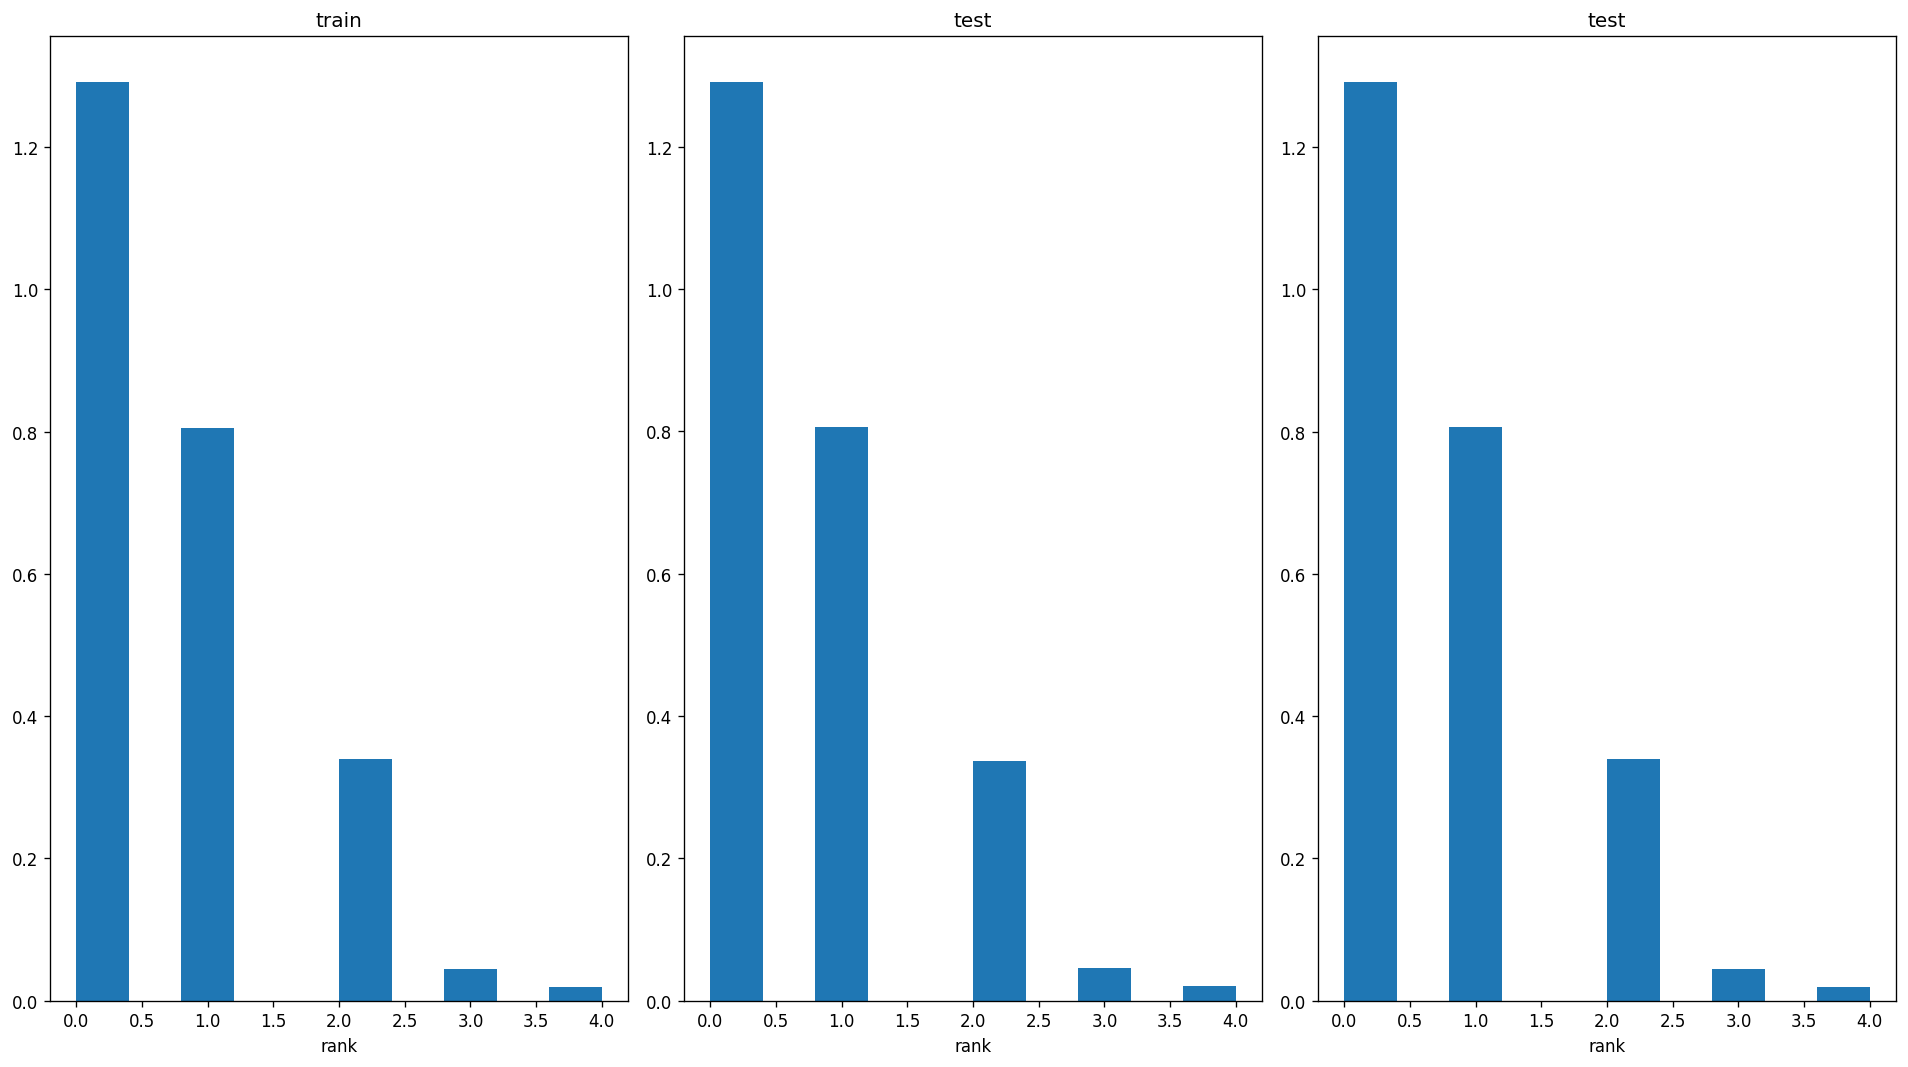

In [7]:
fig, ax = plt.subplots(1, 3, tight_layout=True, dpi=120, figsize=(16, 9))
ax[0].hist(df_train['rank'], density=True)
ax[0].set_title('train')
ax[0].set_xlabel('rank')
ax[1].hist(df_test['rank'], density=True)
ax[1].set_title('test')
ax[1].set_xlabel('rank')
ax[2].hist(df['rank'], density=True)
ax[2].set_title('test')
ax[2].set_xlabel('rank')
None

Чтобы поправить дисбаланс, просто клонируем элементы, количество которых меньше максимального в каждом query_id.
В целом понятно, что лучше подкрутить вероятности "вытаскивания" объекта во время обучения, но для этого нужно будет менять довольно сильно код в некоторых местах, поэтому я так делать не буду, ибо памяти все равно хватает)

In [8]:
df_train = fix_class_dist(df_train)

  0%|          | 0/2000 [00:00<?, ?it/s]

Посмотрим на общее распределение

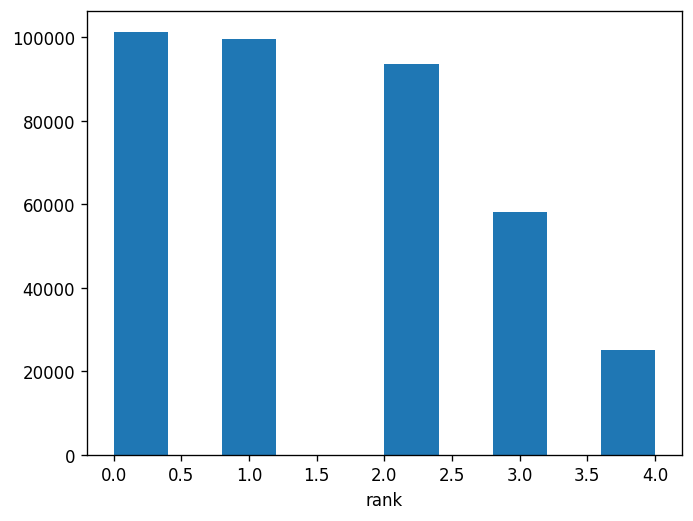

In [9]:
plt.figure(dpi=120)
plt.hist(df_train['rank'])
plt.xlabel('rank')
None

Посмотрим теперь на распределение внутри query_id

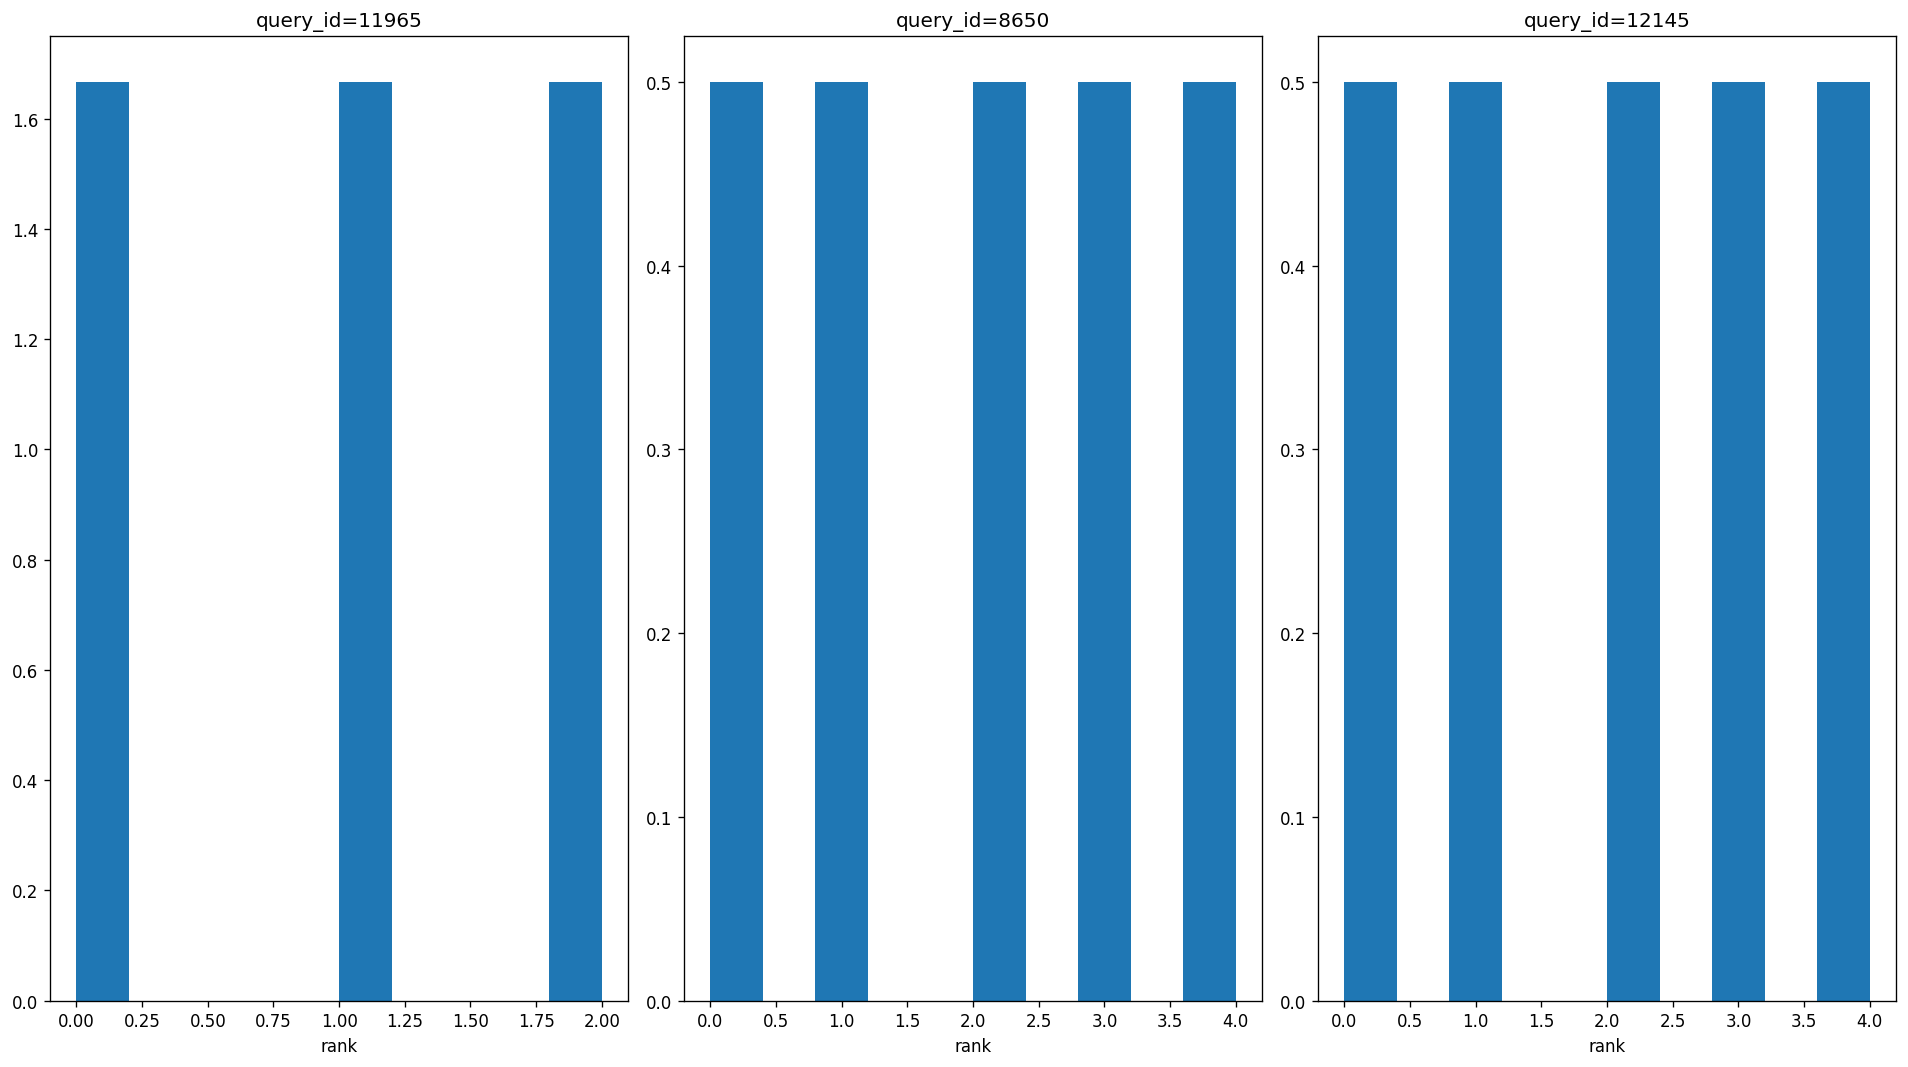

In [10]:
queries = df_train['query_id'].sample(n=3).values
fig, axs = plt.subplots(1, queries.shape[0], tight_layout=True, dpi=120, figsize=(16, 9))
for ax, q in zip(axs, queries):
    ax.hist(df_train[df_train['query_id'] == q]['rank'], density=True)
    ax.set_title(f"query_id={q}")
    ax.set_xlabel("rank")

Такой датасет и возьмем в качестве трейна